In [103]:
import json
import pandas as pd
import glob as gl
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
main_path = '/Users/alduck/Documents/Github/INFSOF_Paper/3-phase_three/mixed_killed_td/*'
mutant_paths = gl.glob(main_path)

In [105]:
len(mutant_paths)

135

In [106]:


# Initialize an empty dictionary to hold data with test ID as keys
data_dict = {}

for paths in mutant_paths:
    folder_name = paths.split('/')[-1]
    
    HMR1_path = paths + '/final_MR2_' + folder_name + '.json'
    main_df_path = paths + '/is_equal_' + folder_name + '.csv'
    
    try:
        with open(HMR1_path, 'r') as file:
            hmr1 = json.load(file)
    except FileNotFoundError:
        print(f"File not found: {HMR1_path}")
        continue
    
    try:
        main_df = pd.read_csv(main_df_path)
    except FileNotFoundError:
        print(f"File not found: {main_df_path}")
        continue
    
    for index, row in main_df.iterrows():
        td_id = row['testID']
        
        # If test ID not in dictionary, initialize sub-dictionary
        if td_id not in data_dict:
            data_dict[td_id] = {}
        
        vs = hmr1.get(td_id, {}).get('MR2_status', 'testID not found')
        vs = 'v' if vs == 'no-violated' else 'nv' if vs != 'testID not found' else vs
        
        if row['is_output_x_equal'] and row['is_output_y_equal'] and row['is_int_x_equal'] and row['is_int_y_equal']:
            mts = 'survived'
        else:
            mts = 'killed'
        
        # Store each folder's vs and mts as separate columns under each test ID
        data_dict[td_id][folder_name + '_vs'] = vs
        data_dict[td_id][folder_name + '_mutant_status'] = mts

# Convert the dictionary into a DataFrame
final_df = pd.DataFrame.from_dict(data_dict, orient='index')

# Check the DataFrame
print(final_df.head())

# If you need to save or further process `final_df`, you can do so here


                        Num46Line10Vers7_vs Num46Line10Vers7_mutant_status  \
VRfNx3Krud5jD43PHgxJdc                   nv                         killed   
SVumrKz2o5MrZ4LmouTKTt                   nv                         killed   
x9GsMzyJggmJVBFwtDdWgGy                  nv                         killed   
HGG3ZoLQDvNSCo68FfqnyR                   nv                         killed   
HrsMvznCqa4BcUSMQxhswN                   nv                         killed   

                        Num324Line33Vers3_vs Num324Line33Vers3_mutant_status  \
VRfNx3Krud5jD43PHgxJdc                    nv                          killed   
SVumrKz2o5MrZ4LmouTKTt                    nv                          killed   
x9GsMzyJggmJVBFwtDdWgGy                    v                          killed   
HGG3ZoLQDvNSCo68FfqnyR                    nv                          killed   
HrsMvznCqa4BcUSMQxhswN                    nv                          killed   

                        Num446Line60Vers1_vs Num44

In [107]:
final_df


,Num46Line10Vers7_vs,Num46Line10Vers7_mutant_status,Num324Line33Vers3_vs,Num324Line33Vers3_mutant_status,Num446Line60Vers1_vs,Num446Line60Vers1_mutant_status,Num920Line114Vers25_vs,Num920Line114Vers25_mutant_status,Num774Line101Vers50_vs,Num774Line101Vers50_mutant_status,...,Num938Line114Vers43_vs,Num938Line114Vers43_mutant_status,Num635Line86Vers17_vs,Num635Line86Vers17_mutant_status,Num45Line10Vers6_vs,Num45Line10Vers6_mutant_status,Num1331Line146Vers17_vs,Num1331Line146Vers17_mutant_status,Num411Line42Vers14_vs,Num411Line42Vers14_mutant_status
VRfNx3Krud5jD43PHgxJdc,nv,killed,nv,killed,v,killed,nv,survived,nv,killed,...,nv,survived,nv,killed,nv,killed,nv,killed,nv,killed
SVumrKz2o5MrZ4LmouTKTt,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,survived,nv,killed,nv,survived,nv,killed,nv,killed
x9GsMzyJggmJVBFwtDdWgGy,nv,killed,v,killed,nv,killed,nv,survived,nv,killed,...,nv,survived,nv,killed,nv,killed,nv,killed,nv,killed
HGG3ZoLQDvNSCo68FfqnyR,nv,killed,nv,killed,nv,killed,nv,survived,nv,survived,...,nv,survived,nv,killed,nv,killed,nv,killed,nv,killed
HrsMvznCqa4BcUSMQxhswN,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,survived,nv,killed,nv,survived,nv,killed,nv,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x4pCU9Zc9sTECRpMRFWG8CP,nv,killed,nv,killed,nv,killed,nv,survived,nv,survived,...,nv,survived,nv,killed,nv,killed,nv,killed,nv,killed
U5YAs6CFd4CpnrgHSMGz5H,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
JsL4mnFBXG9PyUsRgK73KM,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
Cw9zSQNxnMUAPpv63ueZMp,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed


In [108]:
# Drop columns where all elements are equal to value_to_check
df = final_df.copy()

for column in final_df.columns:
    if df[column].eq('killed').all():
        name = column.split('_')[0]+'_vs'
        # .all() checks if all entries in the column are true for the condition
        df.drop(column, axis=1, inplace=True)
        df.drop(name, axis=1, inplace=True)

In [109]:
df.to_csv('mix_hmr2.csv')

In [110]:
df

,Num46Line10Vers7_vs,Num46Line10Vers7_mutant_status,Num920Line114Vers25_vs,Num920Line114Vers25_mutant_status,Num774Line101Vers50_vs,Num774Line101Vers50_mutant_status,Num1145Line122Vers27_vs,Num1145Line122Vers27_mutant_status,Num520Line82Vers3_vs,Num520Line82Vers3_mutant_status,...,Num302Line22Vers1_vs,Num302Line22Vers1_mutant_status,Num773Line101Vers49_vs,Num773Line101Vers49_mutant_status,Num938Line114Vers43_vs,Num938Line114Vers43_mutant_status,Num45Line10Vers6_vs,Num45Line10Vers6_mutant_status,Num411Line42Vers14_vs,Num411Line42Vers14_mutant_status
VRfNx3Krud5jD43PHgxJdc,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,survived,nv,survived,nv,survived,nv,killed,nv,killed
SVumrKz2o5MrZ4LmouTKTt,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,survived,nv,killed
x9GsMzyJggmJVBFwtDdWgGy,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,killed,nv,survived,nv,survived,nv,killed,nv,killed
HGG3ZoLQDvNSCo68FfqnyR,nv,killed,nv,survived,nv,survived,v,killed,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,killed,nv,killed
HrsMvznCqa4BcUSMQxhswN,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,survived,nv,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x4pCU9Zc9sTECRpMRFWG8CP,nv,killed,nv,survived,nv,survived,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,killed,nv,killed
U5YAs6CFd4CpnrgHSMGz5H,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
JsL4mnFBXG9PyUsRgK73KM,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
Cw9zSQNxnMUAPpv63ueZMp,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed


In [111]:
df.describe(include='all')

,Num46Line10Vers7_vs,Num46Line10Vers7_mutant_status,Num920Line114Vers25_vs,Num920Line114Vers25_mutant_status,Num774Line101Vers50_vs,Num774Line101Vers50_mutant_status,Num1145Line122Vers27_vs,Num1145Line122Vers27_mutant_status,Num520Line82Vers3_vs,Num520Line82Vers3_mutant_status,...,Num302Line22Vers1_vs,Num302Line22Vers1_mutant_status,Num773Line101Vers49_vs,Num773Line101Vers49_mutant_status,Num938Line114Vers43_vs,Num938Line114Vers43_mutant_status,Num45Line10Vers6_vs,Num45Line10Vers6_mutant_status,Num411Line42Vers14_vs,Num411Line42Vers14_mutant_status
count,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
unique,1,2,2,2,1,2,2,2,1,2,...,1,2,1,2,2,2,1,2,1,2
top,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
freq,195,187,194,120,195,175,180,100,195,189,...,195,121,195,176,194,120,195,187,195,183


In [112]:
168/2

84.0

In [113]:
df

,Num46Line10Vers7_vs,Num46Line10Vers7_mutant_status,Num920Line114Vers25_vs,Num920Line114Vers25_mutant_status,Num774Line101Vers50_vs,Num774Line101Vers50_mutant_status,Num1145Line122Vers27_vs,Num1145Line122Vers27_mutant_status,Num520Line82Vers3_vs,Num520Line82Vers3_mutant_status,...,Num302Line22Vers1_vs,Num302Line22Vers1_mutant_status,Num773Line101Vers49_vs,Num773Line101Vers49_mutant_status,Num938Line114Vers43_vs,Num938Line114Vers43_mutant_status,Num45Line10Vers6_vs,Num45Line10Vers6_mutant_status,Num411Line42Vers14_vs,Num411Line42Vers14_mutant_status
VRfNx3Krud5jD43PHgxJdc,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,survived,nv,survived,nv,survived,nv,killed,nv,killed
SVumrKz2o5MrZ4LmouTKTt,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,survived,nv,killed
x9GsMzyJggmJVBFwtDdWgGy,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,killed,nv,survived,nv,survived,nv,killed,nv,killed
HGG3ZoLQDvNSCo68FfqnyR,nv,killed,nv,survived,nv,survived,v,killed,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,killed,nv,killed
HrsMvznCqa4BcUSMQxhswN,nv,killed,nv,survived,nv,killed,v,killed,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,survived,nv,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x4pCU9Zc9sTECRpMRFWG8CP,nv,killed,nv,survived,nv,survived,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,survived,nv,killed,nv,killed
U5YAs6CFd4CpnrgHSMGz5H,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
JsL4mnFBXG9PyUsRgK73KM,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed
Cw9zSQNxnMUAPpv63ueZMp,nv,killed,nv,killed,nv,killed,nv,survived,nv,killed,...,nv,killed,nv,killed,nv,killed,nv,killed,nv,killed


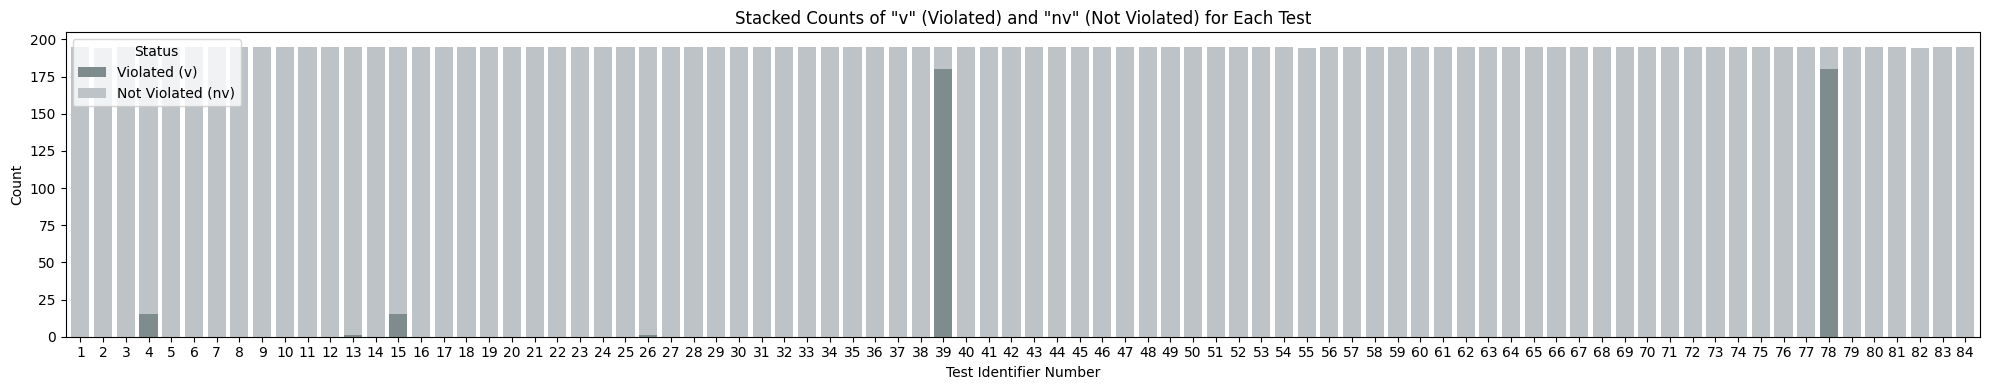

In [114]:
# Filter columns that end with '_vs'
vs_columns = [col for col in df.columns if col.endswith('_vs')]

# Select only the '_vs' columns from the DataFrame
vs_data = df[vs_columns]

# Calculate counts of 'v' and 'nv' for each column
value_counts = vs_data.apply(pd.Series.value_counts).fillna(0).T  # Transpose to make columns suitable for plotting

# Generate new x-axis labels as sequential numbers
x_labels = range(1, len(vs_columns) + 1)

# Plotting
fig, ax = plt.subplots(figsize=(20, 4))
colors = ['#bdc3c7', '#7f8c8d']  # Light gray and dark gray
 #

# Plot each category ('v' and 'nv') stacked
value_counts['v'].plot(kind='bar', ax=ax, color=colors[1], label='Violated (v)', width=0.8)
value_counts['nv'].plot(kind='bar', ax=ax, color=colors[0],  bottom=value_counts['v'], label='Not Violated (nv)', width=0.8)


plt.title('Stacked Counts of "v" (Violated) and "nv" (Not Violated) for Each Test')
plt.xlabel('Test Identifier Number')
plt.ylabel('Count')
plt.xticks(ticks=range(len(vs_columns)), labels=x_labels, rotation=0)  # Set custom x-axis labels
plt.legend(title='Status')

plt.tight_layout()
pdf_path = 'HMR2_vs.pdf'
fig.savefig(pdf_path, format='pdf')
plt.show()

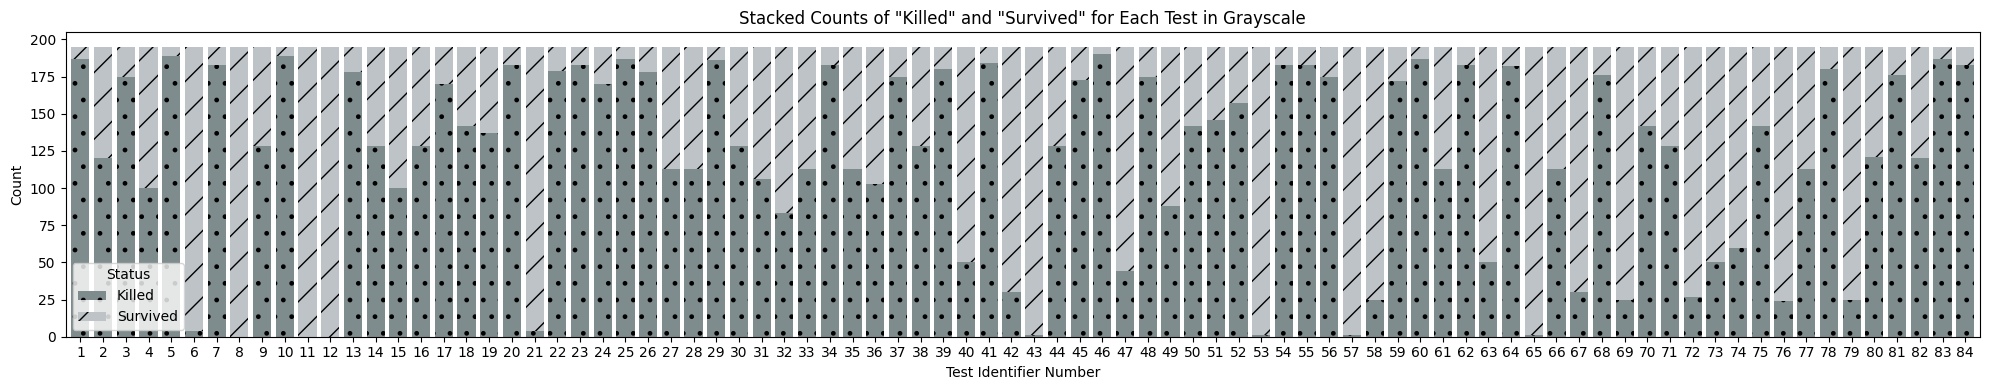

In [115]:
# Filter columns that end with '_vs'
status_columns = [col for col in df.columns if col.endswith('_mutant_status')]

# Select only the '_vs' columns from the DataFrame
status_data = df[status_columns]

# Calculate counts of 'v' and 'nv' for each column
status_counts = status_data.apply(pd.Series.value_counts).fillna(0).T  # Transpose to make columns suitable for plotting

# Generate new x-axis labels as sequential numbers
x_labels = range(1, len(vs_columns) + 1)

# Plotting
fig, ax = plt.subplots(figsize=(20, 4))  # Set figure size for better readability

colors = ['#bdc3c7', '#7f8c8d']  # Light gray and dark gray
patterns = ['/', '.']  # Different hatch patterns

# Plot each category ('killed' and 'survived') stacked with patterns
status_counts['killed'].plot(kind='bar', ax=ax, color=colors[1], hatch=patterns[1], label='Killed', width=0.8)
status_counts['survived'].plot(kind='bar', ax=ax, color=colors[0], hatch=patterns[0], bottom=status_counts['killed'], label='Survived', width=0.8)

plt.title('Stacked Counts of "Killed" and "Survived" for Each Test in Grayscale')
plt.xlabel('Test Identifier Number')
plt.ylabel('Count')
plt.xticks(ticks=range(len(status_columns)), labels=x_labels, rotation=0)  # Set custom x-axis labels with no rotation
plt.legend(title='Status')
plt.tight_layout()  # Adjust layout to make more space

pdf_path = 'HMR2_ms.pdf'
fig.savefig(pdf_path, format='pdf')
plt.show()


In [116]:
# Filter columns that end with '_vs' and '_mutant_status'
vs_columns = [col for col in df.columns if col.endswith('_vs')]
status_columns = [col for col in df.columns if col.endswith('_mutant_status')]

# Select only the relevant columns from the DataFrame
vs_data = df[vs_columns]
status_data = df[status_columns]

# Calculate counts of 'v' and 'nv' for each vs column, and 'killed' and 'survived' for each status column
vs_value_counts = vs_data.apply(pd.Series.value_counts).fillna(0).T  # Transpose for easy calculation
status_value_counts = status_data.apply(pd.Series.value_counts).fillna(0).T  # Transpose for easy calculation

# Calculate proportions
vs_proportions = vs_value_counts.apply(lambda x: x / x.sum(), axis=1)
status_proportions = status_value_counts.apply(lambda x: x / x.sum(), axis=1)

# Creating a combined DataFrame for summary
summary_df = pd.DataFrame({
    'Test Identifier': vs_proportions.index.tolist() + status_proportions.index.tolist(),
    'Violated Proportion': vs_proportions['v'].tolist() + [None] * len(status_proportions),  # Only for vs columns
    'Not Violated Proportion': vs_proportions['nv'].tolist() + [None] * len(status_proportions),  # Only for vs columns
    'Killed Proportion': [None] * len(vs_proportions) + status_proportions['killed'].tolist(),  # Only for status columns
    'Survived Proportion': [None] * len(vs_proportions) + status_proportions['survived'].tolist()  # Only for status columns
})

summary_df

,Test Identifier,Violated Proportion,Not Violated Proportion,Killed Proportion,Survived Proportion
0,Num46Line10Vers7_vs,0.000000,1.000000,NaN,NaN
1,Num920Line114Vers25_vs,0.000000,0.994872,NaN,NaN
2,Num774Line101Vers50_vs,0.000000,1.000000,NaN,NaN
3,Num1145Line122Vers27_vs,0.076923,0.923077,NaN,NaN
4,Num520Line82Vers3_vs,0.000000,1.000000,NaN,NaN
...,...,...,...,...,...
163,Num302Line22Vers1_mutant_status,NaN,NaN,0.620513,0.379487
164,Num773Line101Vers49_mutant_status,NaN,NaN,0.902564,0.097436
165,Num938Line114Vers43_mutant_status,NaN,NaN,0.615385,0.384615
166,Num45Line10Vers6_mutant_status,NaN,NaN,0.958974,0.041026
